In [1]:
import sklearn.datasets as datasets
import pandas as pd
import random
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Para calcular la edad
import time
import datetime
import numpy as np

In [26]:
#funciones auxiliares

def calcular_edad(fecha_nacimeinto):
    nacimiento = datetime.datetime.strptime(fecha_nacimeinto,"%Y-%m-%d")
    fecha = datetime.datetime.strptime("2018-02-01","%Y-%m-%d")

    return ((fecha - nacimiento).days / 365)



def clase_social_a_valor(clase):
    clases = {'AB':1,'C1':2,'C2':3,'D ':3,'E ':3}
    if clase in clases:
        result = clases[clase]
    else:
        result = np.nan
    
    return result

In [27]:
data = pd.read_csv("FullData2.csv")

#borrando missings

missing = data['Marital status'] != 9
data = data[missing]

#descategorizo la clase social
data['Social Class']= data['Social Class'].apply(clase_social_a_valor)
data['Presence of Children']= data['Presence of Children'].apply(lambda x: 1 if x > 1 else 0)
data['Ethnic Origin']= data['Ethnic Origin'].apply(lambda x: 1 if x > 1 else 0)


#calculo la edad a partir de la fecha de nacimiento
data['Date of birth']= data['Date of birth'].apply(calcular_edad)
data.rename(columns={'Date of birth':'Edad'}, inplace=True)

viewing_cols = [col for col in data.columns if "@" in col]
data['Total Viewing'] = data[viewing_cols].sum(axis=1)

#data[viewing_cols] = data[viewing_cols].div(data['Total Viewing'], axis=0)
data.head()



,Panelist ID,Sex code,Edad,Marital status,Household status,Working status,Terminal age of education,Life stage,Ethnic Origin,Disability,...,Deportes@Late Night,Deportes@Overnight,Infantil@Morning,Infantil@Daytime,Infantil@Early Fringe,Infantil@Late Fringe,Infantil@Prime,Infantil@Late Night,Infantil@Overnight,Total Viewing
0,2945301,2,69.465753,2,4,4,1,6,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10195.0
1,4049303,1,7.424658,2,1,5,4,99,0,3,...,0.0,0.0,6.0,4.0,33.0,19.0,1.0,3.0,0.0,2140.0
2,1360102,2,27.608219,1,1,4,3,12,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2678.0
3,4205501,1,74.975342,1,3,4,3,7,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8341.0
4,5079901,2,39.112329,1,2,2,3,9,0,3,...,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,14.0,3620.0


In [36]:
data[data['Presence of Children'] == 0]

,Panelist ID,Sex code,Edad,Marital status,Household status,Working status,Terminal age of education,Life stage,Ethnic Origin,Disability,...,Deportes@Late Night,Deportes@Overnight,Infantil@Morning,Infantil@Daytime,Infantil@Early Fringe,Infantil@Late Fringe,Infantil@Prime,Infantil@Late Night,Infantil@Overnight,Total Viewing


In [4]:
print(viewing_cols)

['Aire@Morning', 'Aire@Daytime', 'Aire@Early Fringe', 'Aire@Late Fringe', 'Aire@Prime', 'Aire@Late Night', 'Aire@Overnight', 'Cable@Morning', 'Cable@Daytime', 'Cable@Early Fringe', 'Cable@Late Fringe', 'Cable@Prime', 'Cable@Late Night', 'Cable@Overnight', 'Deportes@Morning', 'Deportes@Daytime', 'Deportes@Early Fringe', 'Deportes@Late Fringe', 'Deportes@Prime', 'Deportes@Late Night', 'Deportes@Overnight', 'Infantil@Morning', 'Infantil@Daytime', 'Infantil@Early Fringe', 'Infantil@Late Fringe', 'Infantil@Prime', 'Infantil@Late Night', 'Infantil@Overnight']


In [70]:
for i in data.columns:
    if i not in viewing_cols:
        if i not in ['Panelist ID','Edad']:
            print(i)
            print(data[i].value_counts())
            print("-------------------")

Sex code
2    6835
1    6054
Name: Sex code, dtype: int64
-------------------
Marital status
1    6934
2    5955
Name: Marital status, dtype: int64
-------------------
Household status
1    4356
4    3220
2    2657
3    2656
Name: Household status, dtype: int64
-------------------
Working status
1    4983
4    3940
5    2593
2    1308
3      65
Name: Working status, dtype: int64
-------------------
Terminal age of education
2    4903
3    3791
4    2593
1    1602
Name: Terminal age of education, dtype: int64
-------------------
Life stage
7     2384
99    1868
6     1287
11    1115
8     1082
9      989
10     919
1      874
3      679
5      661
4      522
2      263
12     246
Name: Life stage, dtype: int64
-------------------
Ethnic Origin
1     11042
10      455
5       317
6       258
3       170
2       138
7       108
15       79
14       65
13       65
11       55
12       52
9        36
8        34
4         8
17        7
Name: Ethnic Origin, dtype: int64
-------------------
D

In [76]:
cols=[
       'Aire@Morning', 'Aire@Daytime', 'Aire@Early Fringe', 'Aire@Late Fringe',
       'Aire@Prime', 'Aire@Late Night', 'Aire@Overnight', 'Cable@Morning', 'Cable@Daytime',
       'Cable@Early Fringe', 'Cable@Late Fringe', 'Cable@Prime', 'Cable@Late Night', 'Cable@Overnight',
       'Deportes@Morning', 'Deportes@Daytime', 'Deportes@Early Fringe', 'Deportes@Late Fringe', 'Deportes@Prime',
       'Deportes@Late Night', 'Deportes@Overnight', 'Infantil@Morning', 'Infantil@Daytime', 'Infantil@Early Fringe',
       'Infantil@Late Fringe', 'Infantil@Prime', 'Infantil@Late Night', 'Infantil@Overnight']
y='Presence of Children'

In [38]:
cols=['Marital status','Sex code',
        'Working status', 'Terminal age of education',
        'Disability', 'No of TV Sets',
       'No of VCRs', 'No of PVRs', 'No of DVDs', 'No of People',
       'Number of DVD Recorders', 'Number of DVD Players',
       'Number of Sky PVRs', 'Number of other PVRs', 'Broadband',
       'Aire@Morning', 'Aire@Daytime', 'Aire@Early Fringe', 'Aire@Late Fringe',
       'Aire@Prime', 'Aire@Late Night', 'Aire@Overnight', 'Cable@Morning', 'Cable@Daytime',
       'Cable@Early Fringe', 'Cable@Late Fringe', 'Cable@Prime', 'Cable@Late Night', 'Cable@Overnight',
       'Deportes@Morning', 'Deportes@Daytime', 'Deportes@Early Fringe', 'Deportes@Late Fringe', 'Deportes@Prime',
       'Deportes@Late Night', 'Deportes@Overnight', 'Infantil@Morning', 'Infantil@Daytime', 'Infantil@Early Fringe',
       'Infantil@Late Fringe', 'Infantil@Prime', 'Infantil@Late Night', 'Infantil@Overnight','Total Viewing']
y='Presence of Children'

In [39]:
train_X, test_X, train_y, test_y = train_test_split(data[cols], data[y], train_size=0.7, test_size=0.3, random_state=123)

In [40]:
dtree=DecisionTreeClassifier(max_leaf_nodes=3)
dtree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [41]:
predictions=dtree.predict(test_X)
predictions2=dtree.predict(train_X)
acc=accuracy_score(test_y, predictions)
acc2=accuracy_score(train_y, predictions2)

print(acc)
print(acc2)

0.7931212826480476
0.7890711593881623


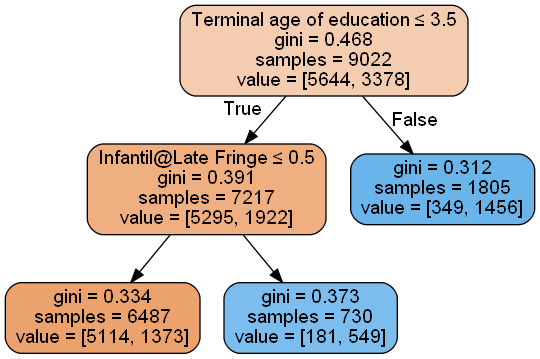

In [42]:
dot_data_entropia = StringIO()
export_graphviz(dtree, out_file=dot_data_entropia,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=cols)
graph_entropia = pydotplus.graph_from_dot_data(dot_data_entropia.getvalue())  
Image(graph_entropia.create_png())

### Testeo imprimir tabla

In [3]:
from IPython.display import display
import pandas as pd

def imprimir_tabla(nombres_columnas,valores_por_columna,nombres_filas):
    diccionario = {}
    
    for i in range(0,len(nombres_columnas)):
        diccionario[nombres_columnas[i]] = valores_por_columna[i]

    dataFrame = pd.DataFrame(diccionario)
    dataFrame.index = nombres_filas
    
    display(dataFrame)
    
imprimir_tabla(['C1','C2','C3'],[[1,2,3],[4,5,6],[7,8,9]],['A','B','C'])

,C1,C2,C3
A,1,4,7
B,2,5,8
C,3,6,9
